Now we need to check if we can calculate the optical path length difference in a simplified potential to obtain the phase change in the electron wave. We then need to check if we can calculate the phase difference by integrating the potential our electron passes through. We will try and do this for an electron with a long wavelength so we can easily plot the wavelength and phase shift as the electron refracts through the potential. We will also try and use a simple linear potential. 

In [ ]:
import sympy as sp
from sympy import Piecewise, DiracDelta
from sympy.core.numbers import pi, oo
from IPython.display import display
from latex2sympy2 import latex2sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget


Again set up constants and sympy symbols, and define the equation in sympy, and make a lambda function out of it.

In [ ]:
#Initialise printing
sp.init_printing()

#Create mathematical symbols
x, y, z = sp.symbols('x y z', real = True)

#Make a linear potential along the x axis
phi_linear = -0.3*x 

#With a gaussian width of std 0.1 in the z-direction. This is so we can easily differentiate and integrate our potential
phi_linear_gauss = -0.3*x*sp.exp(-z**2 / 0.1)

#Perform the phase integral
phase_integral = sp.integrate(phi_linear_gauss, (z, -oo, +oo))
phase_integral_lambda = sp.lambdify(x, phase_integral)

#Calculate the E-Field so we can plot it. 
Ex = -1*phi_linear_gauss.diff(x)
Ey = -1*phi_linear_gauss.diff(y)
Ez = -1*phi_linear_gauss.diff(z)

phi_linear_lambda = sp.lambdify([x, y, z], phi_linear_gauss)
E_lambda = sp.lambdify([x, y, z], [Ex, Ey, Ez], 'numpy')

#Plot the linear potential
sp.plot(phi_linear, (x, -2, 2))

Plot the view of the electron as it moves towards the potential in the x-y plane. 

In [ ]:
z_ = np.linspace(-1, 1, 1000)
plan_figure, plan_ax = plt.subplots()
x_line, xstep = np.linspace(-1, 1, 300, retstep = True)
y_line, ystep = np.linspace(-1, 1, 300, retstep = True)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = 0*np.ones(x_grid.shape)

potential_image = phi_linear_lambda(x_grid, y_grid, 0)
plan_ax.imshow(potential_image, extent=[-1, 1, -1, 1])
plan_ax.contour(potential_image, 25, linewidths = 0.25, colors = 'k', extent = [-1, 1, -1, 1], origin = 'upper')
plan_ax.set_title('Wire Potential Plan View')
plan_ax.set_xlabel('x (m)')
plan_ax.set_ylabel('y (m)')

Plot a side view of the potential 

In [ ]:
zx_figure, zx_ax = plt.subplots()
z_line, zstep = np.linspace(-1, 1, 51, retstep = True)
x_line, xstep = np.linspace(-1, 1, 51, retstep = True)
z_grid, x_grid = np.meshgrid(x_line, z_line)
y_grid = 0*np.ones(x_grid.shape)
potential_image = phi_linear_lambda(x_grid, y_grid, z_grid)
zx_ax.imshow(potential_image, extent=[-1, 1, -1, 1], origin = 'upper')
zx_ax.set_title('Wire Potential Side View')
zx_ax.set_xlabel('z (m)')
zx_ax.set_ylabel('x (m)')

Plot the E-Fields

In [ ]:
Ex_figure, Ex_ax = plt.subplots()
Ez_line, Ezstep = np.linspace(-1, 1, 51, retstep = True)
Ex_line, Exstep = np.linspace(-1, 1, 51, retstep = True)
Ez_grid, Ex_grid = np.meshgrid(Ex_line, Ez_line)
Ey_grid = 0*np.ones(Ex_grid.shape)
efield_image = E_lambda(Ex_grid, Ey_grid, Ez_grid)[0]
Ex_ax.imshow(efield_image, extent=[-1, 1, -1, 1], origin = 'upper')
Ex_ax.set_title('Ex')
Ex_ax.set_xlabel('z (m)')
Ex_ax.set_ylabel('x (m)')

Ez_figure, Ez_ax = plt.subplots()
Ez_line, Ezstep = np.linspace(-1, 1, 51, retstep = True)
Ex_line, Exstep = np.linspace(-1, 1, 51, retstep = True)
Ez_grid, Ex_grid = np.meshgrid(Ex_line, Ez_line)
Ey_grid = 0*np.ones(Ex_grid.shape)
efield_image = E_lambda(Ex_grid, Ey_grid, Ez_grid)[2]
Ez_ax.imshow(efield_image, extent=[-1, 1, -1, 1], origin = 'upper')
Ez_ax.set_title('Ez')
Ez_ax.set_xlabel('z (m)')
Ez_ax.set_ylabel('x (m)')

Again make our ODE solver equation

In [ ]:
def odedopri(f,  x0,  y0,  x1,  tol,  hmax,  hmin,  maxiter, args=()):
    a21 = (1.0/5.0)
    a31 = (3.0/40.0)
    a32 = (9.0/40.0)
    a41 = (44.0/45.0)
    a42 = (-56.0/15.0)
    a43 = (32.0/9.0)
    a51 = (19372.0/6561.0)
    a52 = (-25360.0/2187.0)
    a53 = (64448.0/6561.0)
    a54 = (-212.0/729.0)
    a61 = (9017.0/3168.0)
    a62 = (-355.0/33.0)
    a63 = (46732.0/5247.0)
    a64 = (49.0/176.0)
    a65 = (-5103.0/18656.0)
    a71 = (35.0/384.0)
    a72 = (0.0)
    a73 = (500.0/1113.0)
    a74 = (125.0/192.0)
    a75 = (-2187.0/6784.0)
    a76 = (11.0/84.0)
    c2 = (1.0 / 5.0)
    c3 = (3.0 / 10.0)
    c4 = (4.0 / 5.0)
    c5 = (8.0 / 9.0)
    c6 = (1.0)
    c7 = (1.0)
    b1 = (35.0/384.0)
    b2 = (0.0)
    b3 = (500.0/1113.0)
    b4 = (125.0/192.0)
    b5 = (-2187.0/6784.0)
    b6 = (11.0/84.0)
    b7 = (0.0)
    b1p = (5179.0/57600.0)
    b2p = (0.0)
    b3p = (7571.0/16695.0)
    b4p = (393.0/640.0)
    b5p = (-92097.0/339200.0)
    b6p = (187.0/2100.0)
    b7p = (1.0/40.0)
    x = x0
    y = y0
    h = hmax
    X = np.zeros(maxiter)
    X[0] = x0
    Y = np.zeros((maxiter, len(y0)))
    Y[0] = y0
    
    #We need a special step counter because the ODE dormand prince 
    #method will do a step again with a smaller step size if the error is too large
    step = 1
    for i in range(maxiter):
       # /* Compute the function values */
       K1 = f(x,       y, *args)
       K2 = f(x + c2*h, y+h*(a21*K1), *args)
       K3 = f(x + c3*h, y+h*(a31*K1+a32*K2), *args)
       K4 = f(x + c4*h, y+h*(a41*K1+a42*K2+a43*K3), *args)
       K5 = f(x + c5*h, y+h*(a51*K1+a52*K2+a53*K3+a54*K4), *args)
       K6 = f(x + h, y+h*(a61*K1+a62*K2+a63*K3+a64*K4+a65*K5), *args)
       K7 = f(x + h, y+h*(a71*K1+a72*K2+a73*K3+a74*K4+a75*K5+a76*K6), *args)
       error = abs((b1-b1p)*K1+(b3-b3p)*K3+(b4-b4p)*K4+(b5-b5p)*K5 +
                   (b6-b6p)*K6+(b7-b7p)*K7)
       #Error in X controls tolerance
       error = max(error)
       # error control
       if error != 0.0:
           delta = 0.84 * pow(tol / error, (1.0/5.0))
       else:
           delta = np.inf
       if (error < tol):
          x = x + h
          X[step] = x
          y = y + h * (b1*K1+b3*K3+b4*K4+b5*K5+b6*K6)
          Y[step, :] = y
          step+=1
       if (delta <= 0.1):
          h = h * 0.1
       elif (delta >= 4.0):
          h = h * 4.0
       else:
          h = delta * h
       if (h > hmax):
          h = hmax
       if (x >= x1):
          print('reached end')
          break
       elif (x + h > x1):
          h = x1 - x
       elif (h < hmin):
          print('Below hmin')
          break
    return X, Y, step

And make our potential function that we need to put into our ODE solver

In [ ]:
def make_potential_and_efield(phi, phi_0, x, y, z, eps):
    
    phi_hat = (phi)*(1+eps*(phi))
    
    #Include the initial potential of the electron from the gun. 
    phi_hat_wires_electron = phi_0 - phi_hat
    
    #Get E field function. Notice there is no negative sign, as the way hawkes uses phi_hat, there is no minus before it (Equation 3.22).
    dphi_hat_wires_electron_dx = phi_hat_wires_electron.diff(x)
    dphi_hat_wires_electron_dy = phi_hat_wires_electron.diff(y)
    dphi_hat_wires_electron_dz = phi_hat_wires_electron.diff(z)

    phi_hat_wires_electron_lambda = sp.lambdify([x, y, z], phi_hat_wires_electron, 'numpy')
    dphi_hat_wires_electron_lambda = sp.lambdify([x, y, z], [dphi_hat_wires_electron_dx, dphi_hat_wires_electron_dy, dphi_hat_wires_electron_dz], 'numpy')
    
    return phi_hat_wires_electron_lambda, dphi_hat_wires_electron_lambda

Define constants. For now we are going to give every physical constant a value of 1. This is so we don't have to worry about running into numerical precision errors. Later we will have to worry about numerical errors, but let's just ignore it for now by keeping everything at a value of 1. 

In [ ]:
e = -1#-1.60217662e-19 #unit C
m = 1#9.10938356e-31 #unit kg
h = 1#6.62607015e-34 #unit J . s 
c_l = 1#2.99792458e8 #unit m/s
eps_0_val = 1#8.85418782e-12 #permittivity unit F/m

#Define acceleration potential of electron
phi_0 = 0.125 #unit V

#Other constants which we will need later, but are irrelevant now. 
v_0 = c_l*(1-(1-(e*phi_0)/(m*(c_l**2)))**(-2))**(1/2) #unit m/s
eta = (abs(e)/(2*m))**(1/2) #Constant from Hawkes
gamma = 1/(1-(v_0**2/c_l**2))**(1/2) #Gamma factor
eps = abs(e)/(2*m*c_l**2) #eps as defined in Hawkes, different from the permittivity of free space. 

Trajectory equation of motion from Hawkes

In [ ]:
def trajectory_equation_of_motion(z, x, phi_hat_lambda, dphi_hat_lambda):
    
    p = np.sqrt(1+x[1]**2+x[3]**2) #obtain slope of ray
    phi_hat = phi_hat_lambda(x[0], x[2], z) #evaluate potential
    dphi_hat_x, dphi_hat_y, dphi_hat_z = dphi_hat_lambda(x[0], x[2], z) #evaluate the efield
    
    return np.array([x[1], (p**2)/(2*phi_hat)*(dphi_hat_x-x[1]*dphi_hat_z), x[3], (p**2)/(2*phi_hat)*(dphi_hat_y-x[3]*dphi_hat_z)]) #evaluate the velocities and accelerations, [vx, ax, vy, ay]

In [ ]:
phi_hat_lambda, dphi_hat_lambda = make_potential_and_efield(phi_linear_gauss, phi_0, x, y, z, eps)

Perform ray tracing. 

In [ ]:
x0 = np.array([0, 0, 0, 0]) #x, x', y, y'
z0 = -1 #Initial z plane
zF = 1 #Final z plane

tol = 1e-12 #error tolerance in the calculation (error in force or velocity on one axis is no larger than tolerance)
max_step_size = 1e-3 #m
min_step_size = 1e-15 #m
z_out, x_out, steps = odedopri(trajectory_equation_of_motion,  z0,  x0,  zF,  tol ,  max_step_size,  min_step_size,  10000, args=(phi_hat_lambda, dphi_hat_lambda))

x, y, z = x_out[:steps, 0], x_out[:steps, 0], z_out[:steps]
wavelengths = h/(2*abs(e)*m*phi_hat_lambda(x, y, z))**(1/2)

#Make a list of wavelengths that are normalised so we can color them. 
wavelengths_norm = (wavelengths-min(wavelengths))/(max(wavelengths)-min(wavelengths))
colors = plt.cm.jet(wavelengths_norm)


Plot path of ray in z-y (ray should not see any deflection) and z-x plane (ray should be deflected significantly)

In [ ]:
plt.figure()
plt.plot(z_out[:steps], x_out[:steps, 0])
plt.title('Ray path through wires (wires located around z=0)')
plt.xlabel('z (m)')
plt.ylabel('x (m)')

print('X positional deflection (m):', abs(x_out[0, 0]-x_out[steps-1, 0]))
print('Y positional deflection (m):', abs(x_out[0, 2]-x_out[steps-1, 2]))



Plot the "wavelength" of the electron as it moves through the potential. For now I have not been too carful about the sign of every value sign, but I will have to consider it again later. Now I just need to check if I can calculate a phase difference. 

In [ ]:
plt.figure()
plt.title('Wavelength of Electron as it moves through potential')
plt.xlabel('z (m)')
plt.ylabel('$\lambda$ (m)')
plt.plot(z, wavelengths)


Check what the wavelength is - I have tried to set it so that it is 2.0 at the beginning, which makes it easier for us to check if our path length calculation is correct.

In [ ]:
print(wavelengths[0])

Now we need to perform the optical path length calculation. I will keep this simple, and only solve the basic optical path length integral: 

In [ ]:
from scipy.integrate import simpson
def optical_path_length(x, y, z, phi_hat_lambda):
    
    deltax, deltay, deltaz = np.diff(x), np.diff(y), np.diff(z) #get the differences between each coordinate
    s = np.cumsum(np.pad(np.sqrt(deltax**2+deltay**2+deltaz**2), (1, 0), "constant")) #path length calculation, with 0 appended to the start
    n = np.sqrt(2*phi_hat_lambda(x, y, z))
    opl_n = simpson(n, s)
    
    return s, n, opl_n

s, n, opl_n = optical_path_length(x_out[:steps, 0], x_out[:steps, 2], z_out[:steps], phi_hat_lambda)
%timeit simpson(n, s)
print(opl_n)

plt.figure()
plt.xlabel('Path Length (s) (m)')
plt.ylabel('Refractive Index (n) - No Unit')
plt.plot(s, n, '-g')

Calculate the phase difference using the optical path length calculation of the deflected ray. 

In [ ]:
#Calculate optical path length of ray that has not been through the wire, and still has the original wavelength
z_starting_at_0 = z+abs(z[-1])
opl_one = abs(z_starting_at_0[-1]-z_starting_at_0[0])*(1/wavelengths[0])

''
phase_difference = ((2*np.pi)*(opl_n - opl_one))/wavelengths[0]
print(phase_difference)

I am not sure if a phase difference of 0.51146... radians is correct, but it's about one tenth of a full wavelength, and after we plot it below it seems reasonable. 

In [ ]:
plt.figure()
z0 = np.linspace(z_starting_at_0[0], z_starting_at_0[-1], 1000)
plt.plot(z0, np.sin(2 * np.pi * 1/wavelengths[0] * z0 ), color = colors[0], linewidth = 5, alpha = 0.2, label = 'Unrefracted Ray')
plt.plot([], [], '--', label = 'Refracted Ray', color = colors[0])
plt.xlabel('Path Length (s) (m)')
plt.ylabel('Amplitude of Ray Path - No Unit')
plt.title("Wavelength of Rays throughout the path" 
          "\n"
          "Color of refracted ray corresponds to a change in wavelength")

for idx, wavelength in enumerate(wavelengths[:-1]):
    s_idx = np.linspace(s[idx], s[idx+1], 100)
    plt.plot(s_idx, np.sin(2 * np.pi * 1/wavelengths[idx] * s_idx), color = colors[idx], linestyle = '--')
    
plt.legend()
plt.xlim([0, 2.5])


The plot above shows the path length of the ray through the wire model, and the path length of an "unrefracted" ray that moves unperturbed through the system. Both rays end up in the same plane in z, but you can see that the refracted ray has been "phase shifted" because it's wavelength has changed, and because it has travelled a longer path to the same z-plane. Next thing to do is to check if we can still calculate this when we reintroduce the physical constants. I am wary about this because compare this phase shift to a multislice calculation, and also Giulio Pozzi's analytical model. Then we can try and plot many rays, and see if we can visualise a complete phase image of this potential. Then we can translate it to the wire model. 

I am worried about the numerical precision of this current method, as when we rescale it with physical values, a lot of values will be very small such as the wavelength and we may end up going beyond machine precision when we try and calculate the optical path length. There are a number of things to try.

1. Non-dimensionalise the equation of motion, so as many parameters as possible are near 1. This is possible, but could be time consuming.
2. Solve the equation of motion with a DOP853 method from scipy (7th order method), which should give us a very accurate estimate of the path. We can then use the interpolation method from scipy
   to help us solve the path length integral extremely accurately. 
3. Another option is to explore how to solve the path length integral analytically, which should be able to give us the optical path length for any path we solve for numerically. I have a feeling that if I understood more, I could get a generalised expression for the phase of a ray after it passes through the model, and then much of these numerical solutions would be unneccessary. It all relates to a calculation of the path integral S (aka optical path length), where wavefronts are defined where S is a constant along the path. 

3: Let's have a look first at solving analytically some of the equations in this notebook. It might be possible to find the path integral equation S for this simplified system, which will give me the optical path length directly after I solve for the particle path numerically. This way we avoid solving the path integral numerically. 

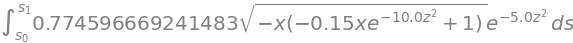

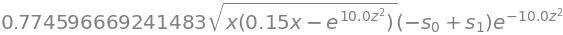

In [255]:
x, y, z, s, s0, s1, dz = sp.symbols('x y z s s_0, s_1 dz', real = True)

x_prime = sp.Derivative(x, z, 1)
y_prime = sp.Derivative(y, z, 1)

rho = x_prime**2+y_prime**2+1

phi_hat = (phi_linear_gauss)*(1+eps*(phi_linear_gauss))
S_hat = sp.Integral(sp.sqrt(2 *phi_hat), (s, s0, s1))

display((rho*dz).simplify())
display(S_hat)

action = S_hat.doit().simplify()
display(action)
action.subs({x:-0.8059915000452004, z0:-1, z1:1}).doit().evalf()



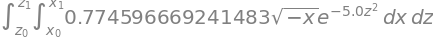

In [261]:
import sympy as sp

dx, dy, dz = sp.symbols('dx dy dz')
x, y, z, x0, x1, z0, z1 = sp.symbols('x y z x_0 x_1 z_0 z_1', real = True)

phi_hat = (phi_linear_gauss)#*(1+eps*(phi_linear_gauss))
n = sp.sqrt(2*phi_hat) # Define your scalar field
ds = sp.sqrt(dx**2 + dy**2 + dz**2)

S = sp.Integral(n, (x, x0, x1), (z, z0, z1))
display(S)
action = S.doit().simplify()
action.subs({x:-0.8059915000452004, z0:-1, z1:1}).doit().evalf()
